In [1]:
import matplotlib.pyplot as plt #thu vien dung de ve
import numpy as np #thu vien so hoc
from sklearn.datasets import make_blobs #hafm dung tao du lieu ngau nhien
from sklearn.cluster import KMeans #ham da dc implement cho thuat toan Kmeans

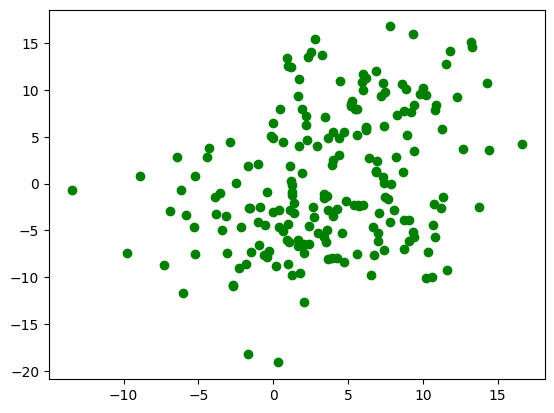

In [46]:
x, _ = make_blobs(n_samples=200, n_features=2 ,cluster_std=4, random_state=97)
x.shape
x1 = x[:, 0]#: lay taat cac cac diem du lieu
x2 = x[:, 1]
plt.scatter(x1,x2, color='green')

In [34]:
# Hàm: getLabels
# -------------
# Trả về nhãn cho mỗi điểm dữ liệu trong tập dữ liệu.
def getLabels(dataSet, centroids):
    labels = []
    for point in dataSet:
        # Tính khoảng cách từ điểm dữ liệu đến các trọng tâm
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        # Gán nhãn cho điểm dữ liệu dựa trên trọng tâm gần nhất
        label = np.argmin(distances)
        labels.append(label)
    return labels

# Hàm: getCentroids
# -------------
# Trả về k trọng tâm dựa trên các nhãn và tập dữ liệu.
def getCentroids(dataSet, labels, k):
    centroids = []
    for i in range(k):
        # Lấy các điểm dữ liệu thuộc cụm i
        cluster_points = [dataSet[j] for j in range(len(dataSet)) if labels[j] == i]
        # Tính trung bình của các điểm dữ liệu trong cụm i để có trọng tâm mới
        new_centroid = np.mean(cluster_points, axis=0)
        centroids.append(new_centroid)
    return centroids

# Hàm: getRandomCentroids
# -------------
# Trả về k trọng tâm ngẫu nhiên từ tập dữ liệu, mỗi trọng tâm có số chiều là n.
def getRandomCentroids(dataSet, k):
    # Lấy ngẫu nhiên k chỉ mục từ tập dữ liệu
    indices = np.random.choice(len(dataSet), k, replace=False)
    # Lấy các trọng tâm từ các chỉ mục đã chọn
    centroids = [dataSet[i] for i in indices]
    return centroids
# Hàm: shouldStop
# -------------
# Trả về True hoặc False, nếu True thì k-means đã hoàn tất, tức là không có sự thay đổi nào.
def shouldStop(oldCentroids, centroids):
    return np.array_equal(oldCentroids, centroids)



def kmeans(dataSet, k):
    # Khởi tạo trọng tâm ngẫu nhiên
    numFeatures = dataSet.shape[1]
    centroids = getRandomCentroids(dataSet, k)
    
    # Khởi tạo biến cũ trọng tâm
    oldCentroids = None
    
    # Chạy thuật toán k-means chính
    while not shouldStop(oldCentroids, centroids):
        # Lưu trữ trọng tâm cũ để kiểm tra hội tụ
        oldCentroids = centroids
        
        # Gán nhãn cho mỗi điểm dữ liệu
        labels = getLabels(dataSet, centroids)
        
        # Tính toán trọng tâm mới
        centroids = getCentroids(dataSet, labels, k)
        
    # Trả về trọng tâm cuối cùng
    return centroids

Trọng tâm cuối cùng:
[ 6.88990615 -4.17314015]
[9.77476395 9.56024463]
[2.70440332 6.59022147]
[-1.62870129 -5.30513254]


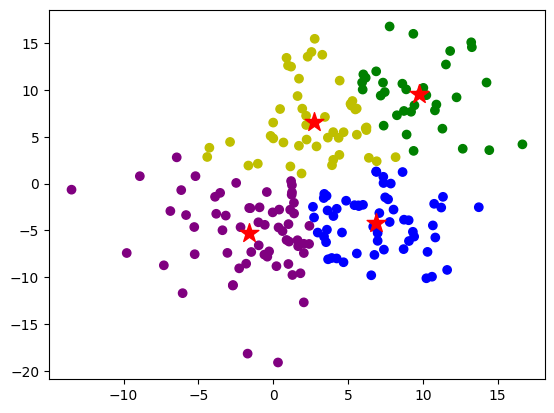

In [51]:
# Định nghĩa số lượng cụm (k)
k = 4

# Chạy thuật toán K-means
centroids = kmeans(x, k)

# In trọng tâm cuối cùng
print("Trọng tâm cuối cùng:")
for centroid in centroids:
    print(centroid)

# Trực quan hóa kết quả
color_dict = {0:'b', 1:'g', 2:'y',3:'purple'}
labels = getLabels(x, centroids)
colors = [color_dict[label] for label in labels]
plt.scatter(x1, x2,  color=colors)  # Vẽ các điểm dữ liệu
centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, color='red')  # Vẽ các trọng tâm
plt.show()


In [52]:
def calculate_average_distance(centroids):
    num_centroids = len(centroids)
    total_distance = 0
    
    for i in range(num_centroids):
        for j in range(i+1, num_centroids):
            distance = np.linalg.norm(centroids[i] - centroids[j])
            total_distance += distance
    
    # Tính độ lệch khoảng cách trung bình
    average_distance = total_distance / (num_centroids * (num_centroids - 1) / 2)
    
    return average_distance

# Gọi hàm để tính độ lệch khoảng cách trung bình giữa các centroid
average_distance = calculate_average_distance(centroids)
print("Độ lệch khoảng cách trung bình giữa các centroid:", average_distance)


Độ lệch khoảng cách trung bình giữa các centroid: 12.206572446525525


In [53]:
def run_kmeans_multiple_times(dataSet, k, num_runs):
    for i in range(num_runs):
        centroids = kmeans(dataSet, k)  # Chạy thuật toán K-means
        
        # Tính độ lệch khoảng cách trung bình giữa các centroid
        avg_distance = calculate_average_distance(centroids)
        
        # In ra kết quả độ lệch khoảng cách trung bình giữa các centroid
        print("Lần chạy thứ", i+1, "- Độ lệch khoảng cách trung bình:", avg_distance)
        
# Số lần chạy thuật toán K-means
num_runs = 3

# Chạy thuật toán K-means nhiều lần và in ra kết quả
run_kmeans_multiple_times(x, k, num_runs)


Lần chạy thứ 1 - Độ lệch khoảng cách trung bình: 11.263681561272044
Lần chạy thứ 2 - Độ lệch khoảng cách trung bình: 12.206572446525525
Lần chạy thứ 3 - Độ lệch khoảng cách trung bình: 11.572029886644268


In [56]:
def run_kmeans_multiple_times(dataSet, k, num_runs):
    min_avg_distance = float('inf')  # Khởi tạo độ lệch khoảng cách trung bình nhỏ nhất
    best_centroids = None  # Khởi tạo trọng tâm tốt nhất
    
    for _ in range(num_runs):
        centroids = kmeans(dataSet, k)  # Chạy thuật toán K-means
        
        # Tính độ lệch khoảng cách trung bình giữa các centroid
        avg_distance = calculate_average_distance(centroids)
        
        # Kiểm tra xem có phải là lần chạy tốt nhất không
        if avg_distance < min_avg_distance:
            min_avg_distance = avg_distance
            best_centroids = centroids
    
    return min_avg_distance, best_centroids

# Số lần chạy thuật toán K-means
num_runs = 3

# Chạy thuật toán K-means nhiều lần và lấy kết quả tốt nhất
min_avg_distance, best_centroids = run_kmeans_multiple_times(x, k, num_runs)


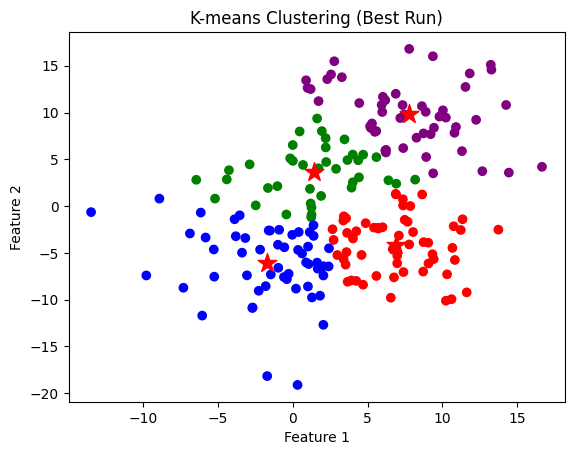

In [60]:
# Lấy nhãn cho mỗi điểm dữ liệu từ lần chạy tốt nhất
best_labels = getLabels(x, best_centroids)

# Tạo một từ điển ánh xạ từ nhãn cụm sang màu sắc
color_dict = {0: 'r', 1: 'g', 2: 'b', 3: 'purple'}

# Tạo danh sách màu sắc cho các điểm dữ liệu
colors = [color_dict[label] for label in best_labels]

# Vẽ các điểm dữ liệu với màu tương ứng
plt.scatter(x[:, 0], x[:, 1], c=colors)

best_centroids_np = np.array(best_centroids)
plt.scatter(best_centroids_np[:, 0], best_centroids_np[:, 1], marker='*', s=200, color='red')


plt.title('K-means Clustering (Best Run)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()